In [1]:
def value_num(text):
    
    if 'K' in text:
        value =0.001
    else:
        value =1
    
    # Remove "$" and "k" characters using regular expression
    text_stripped = re.sub(r'[\$\s\,M]', '', text)
    
    # Find numeric portions and convert to float
    numeric_values = [float(match) for match in re.findall(r'\d+\.\d+|\d+', text_stripped)]
    
    # Sum numeric values if there are multiple, or return a single float if there's only one
    result = sum(numeric_values) if numeric_values else None
    
    return result*value

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler

# Generating some example data
df = pd.read_csv('fifa_data.csv')

In [3]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [4]:
df = df.drop(['ID','Name','Photo','Nationality','Flag','Club','Club Logo','Special',
       'Preferred Foot','Work Rate', 'Body Type', 'Real Face','Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],axis = 1)
df = df.dropna()


In [5]:
df

,Unnamed: 0,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Position,Release Clause
0,0,31,94,94,€110.5M,€565K,5.0,4.0,4.0,RF,€226.5M
1,1,33,94,94,€77M,€405K,5.0,4.0,5.0,ST,€127.1M
2,2,26,92,93,€118.5M,€290K,5.0,5.0,5.0,LW,€228.1M
3,3,27,91,93,€72M,€260K,4.0,3.0,1.0,GK,€138.6M
4,4,27,91,92,€102M,€355K,4.0,5.0,4.0,RCM,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,19,47,65,€60K,€1K,1.0,2.0,2.0,CM,€143K
18203,18203,19,47,63,€60K,€1K,1.0,2.0,2.0,ST,€113K
18204,18204,16,47,67,€60K,€1K,1.0,3.0,2.0,ST,€165K
18205,18205,17,47,66,€60K,€1K,1.0,3.0,2.0,RW,€143K


In [6]:
df['Value_float'] = df['Value'].apply(value_num)
df['Release Clause_float'] = df['Release Clause'].apply(value_num)
df['Wage_float'] = df['Wage'].apply(value_num)
df.dtypes

Unnamed: 0                    int64
Age                           int64
Overall                       int64
Potential                     int64
Value                        object
Wage                         object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Position                     object
Release Clause               object
Value_float                 float64
Release Clause_float        float64
Wage_float                  float64
dtype: object

In [7]:
df = df.drop(['Unnamed: 0','Value','Wage','Release Clause'],axis = 1)

In [8]:
df

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Position,Value_float,Release Clause_float,Wage_float
0,31,94,94,5.0,4.0,4.0,RF,110.50,226.500,0.565
1,33,94,94,5.0,4.0,5.0,ST,77.00,127.100,0.405
2,26,92,93,5.0,5.0,5.0,LW,118.50,228.100,0.290
3,27,91,93,4.0,3.0,1.0,GK,72.00,138.600,0.260
4,27,91,92,4.0,5.0,4.0,RCM,102.00,196.400,0.355
...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1.0,2.0,2.0,CM,0.06,0.143,0.001
18203,19,47,63,1.0,2.0,2.0,ST,0.06,0.113,0.001
18204,16,47,67,1.0,3.0,2.0,ST,0.06,0.165,0.001
18205,17,47,66,1.0,3.0,2.0,RW,0.06,0.143,0.001


In [9]:
df = df.drop_duplicates()

In [10]:
def get_position(text):
    if text == 'RCB' or text == 'LCB':
        text = 'CB'
    elif text == 'RDM' or text == 'LDM':
        text = 'CDM'
    elif text == 'RCM' or text == 'LCM':
        text = 'CM'
    elif text == 'RS' or text == 'LS':
        text = 'ST'
    elif text == 'RAM' or text == 'LAM':
        text = 'CAM'
    elif text == 'RF' or text == 'LF':
        text = 'CF'
    
    return text

In [11]:
df['Position_modified'] = df['Position'].apply(get_position)
df.sample(10)

C:\Users\mohamed hanafy\AppData\Local\Temp\ipykernel_12380\1364071301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position_modified'] = df['Position'].apply(get_position)


,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Position,Value_float,Release Clause_float,Wage_float,Position_modified
2093,28,74,74,1.0,4.0,4.0,LW,5.500,9.900,0.039,LW
2411,22,74,81,1.0,4.0,3.0,CAM,8.000,18.400,0.001,CAM
9064,30,66,66,1.0,3.0,2.0,ST,0.625,1.100,0.004,ST
6411,27,69,70,1.0,3.0,3.0,LB,0.975,1.600,0.005,LB
3607,26,72,74,1.0,2.0,2.0,RDM,3.100,5.200,0.005,CDM
11386,32,64,64,1.0,2.0,2.0,CM,0.350,0.560,0.001,CM
18154,17,48,66,1.0,2.0,2.0,LM,0.060,0.143,0.001,LM
15478,27,59,61,1.0,2.0,2.0,LCB,0.150,0.199,0.001,CB
14435,17,61,83,1.0,4.0,2.0,LB,0.500,1.300,0.001,LB
16281,21,57,67,1.0,3.0,2.0,CDM,0.150,0.248,0.001,CDM


In [12]:
df['Position_modified'].value_counts()

CB     2813
ST     2270
CM     1968
GK     1871
CDM    1313
LB     1212
RB     1192
RM     1020
LM     1006
CAM     909
LW      338
RW      324
CF       94
RWB      84
LWB      76
Name: Position_modified, dtype: int64

In [13]:
df = df.drop('Position',axis = 1)

In [14]:
df_dummies = pd.get_dummies(df['Position_modified'])

In [15]:
df = pd.concat([df, df_dummies], axis=1)
df

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Value_float,Release Clause_float,Wage_float,Position_modified,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,31,94,94,5.0,4.0,4.0,110.50,226.500,0.565,CF,...,0,0,0,0,0,0,0,0,0,0
1,33,94,94,5.0,4.0,5.0,77.00,127.100,0.405,ST,...,0,0,0,0,0,0,0,0,0,1
2,26,92,93,5.0,5.0,5.0,118.50,228.100,0.290,LW,...,0,0,0,1,0,0,0,0,0,0
3,27,91,93,4.0,3.0,1.0,72.00,138.600,0.260,GK,...,1,0,0,0,0,0,0,0,0,0
4,27,91,92,4.0,5.0,4.0,102.00,196.400,0.355,CM,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1.0,2.0,2.0,0.06,0.143,0.001,CM,...,0,0,0,0,0,0,0,0,0,0
18203,19,47,63,1.0,2.0,2.0,0.06,0.113,0.001,ST,...,0,0,0,0,0,0,0,0,0,1
18204,16,47,67,1.0,3.0,2.0,0.06,0.165,0.001,ST,...,0,0,0,0,0,0,0,0,0,1
18205,17,47,66,1.0,3.0,2.0,0.06,0.143,0.001,RW,...,0,0,0,0,0,0,0,1,0,0


In [16]:
df = df.drop(['Position_modified'],axis = 1)

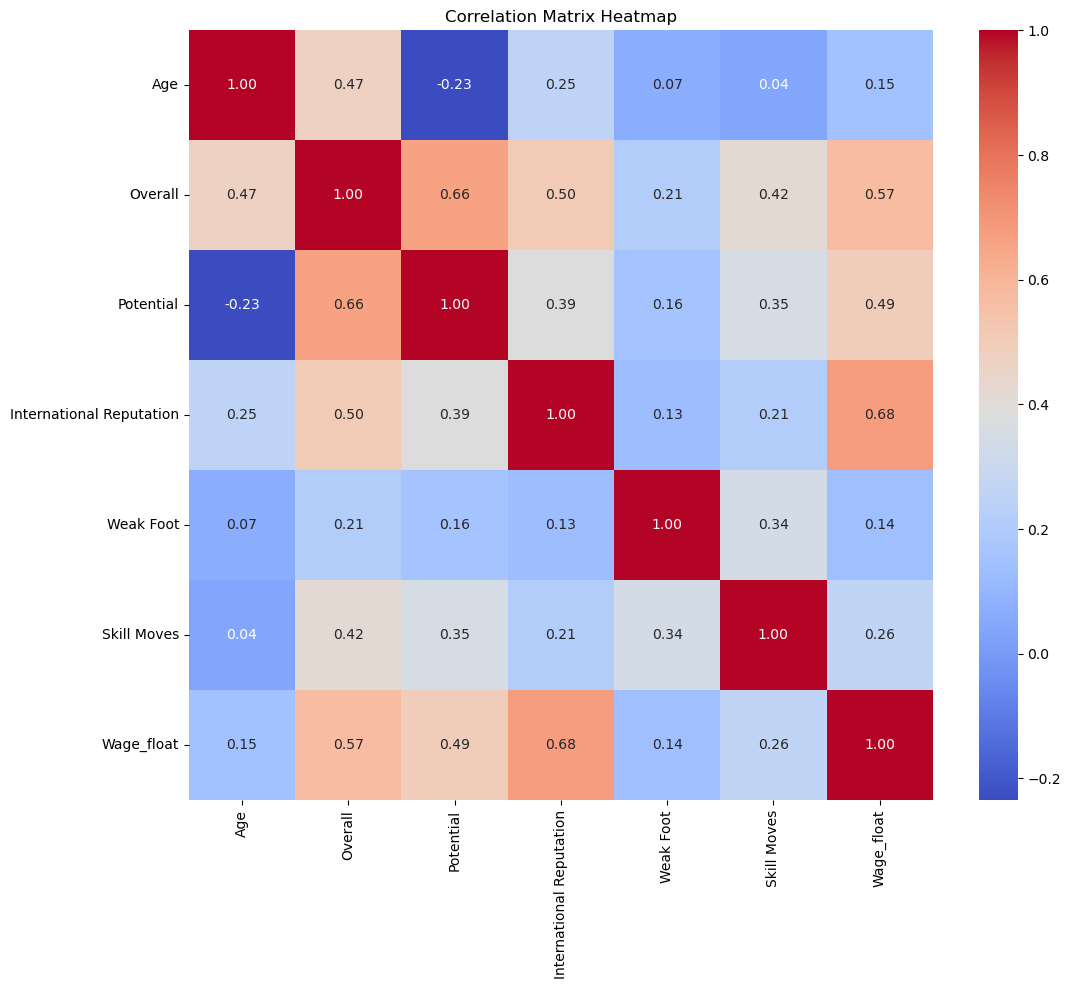

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the specified columns
columns_of_interest = ['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot',
                        'Skill Moves', 'Wage_float']

# Select the specified columns from the DataFrame
selected_columns = df[columns_of_interest]

# Create a correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [18]:
X = df.drop('Release Clause_float',axis = 1)
y = df['Release Clause_float']


In [19]:
X.columns

Index(['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Value_float', 'Wage_float', 'CAM', 'CB', 'CDM', 'CF',
       'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST'],
      dtype='object')

In [20]:
y

0        226.500
1        127.100
2        228.100
3        138.600
4        196.400
          ...   
18202      0.143
18203      0.113
18204      0.165
18205      0.143
18206      0.165
Name: Release Clause_float, Length: 16490, dtype: float64

In [21]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.6, test_size=0.4, random_state=42)

In [22]:
# Create a StandardScaler instance
scaler = StandardScaler()
columns_to_standardize = ['Value_float', 'Wage_float']

# Fit the scaler to the selected columns and transform them
scaled_columns_train = scaler.fit_transform(X_train[['Value_float','Wage_float']])
scaled_columns_test = scaler.fit_transform(X_test[['Value_float','Wage_float']])

# Replace the original columns with the standardized values in the DataFrame
X_train[columns_to_standardize] = scaled_columns_train
X_test[columns_to_standardize] = scaled_columns_test

# Display the DataFrame with standardized values
df

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Value_float,Release Clause_float,Wage_float,CAM,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,31,94,94,5.0,4.0,4.0,110.50,226.500,0.565,0,...,0,0,0,0,0,0,0,0,0,0
1,33,94,94,5.0,4.0,5.0,77.00,127.100,0.405,0,...,0,0,0,0,0,0,0,0,0,1
2,26,92,93,5.0,5.0,5.0,118.50,228.100,0.290,0,...,0,0,0,1,0,0,0,0,0,0
3,27,91,93,4.0,3.0,1.0,72.00,138.600,0.260,0,...,1,0,0,0,0,0,0,0,0,0
4,27,91,92,4.0,5.0,4.0,102.00,196.400,0.355,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1.0,2.0,2.0,0.06,0.143,0.001,0,...,0,0,0,0,0,0,0,0,0,0
18203,19,47,63,1.0,2.0,2.0,0.06,0.113,0.001,0,...,0,0,0,0,0,0,0,0,0,1
18204,16,47,67,1.0,3.0,2.0,0.06,0.165,0.001,0,...,0,0,0,0,0,0,0,0,0,1
18205,17,47,66,1.0,3.0,2.0,0.06,0.143,0.001,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

model.score(X_test,y_test) * 100

98.75530406221101

In [24]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)  # cv is the number of folds (e.g., 5)

# Display the cross-validated scores
print("Cross-validated Scores:", cv_scores)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Cross-validated Scores: [ 0.98353281  0.91337127  0.85250313  0.76098246 -2.00253923]
Mean Squared Error: 1.6172386367267297


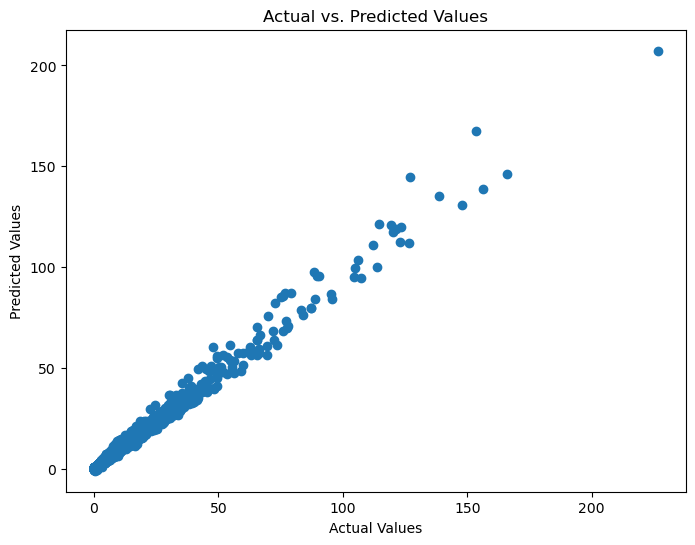

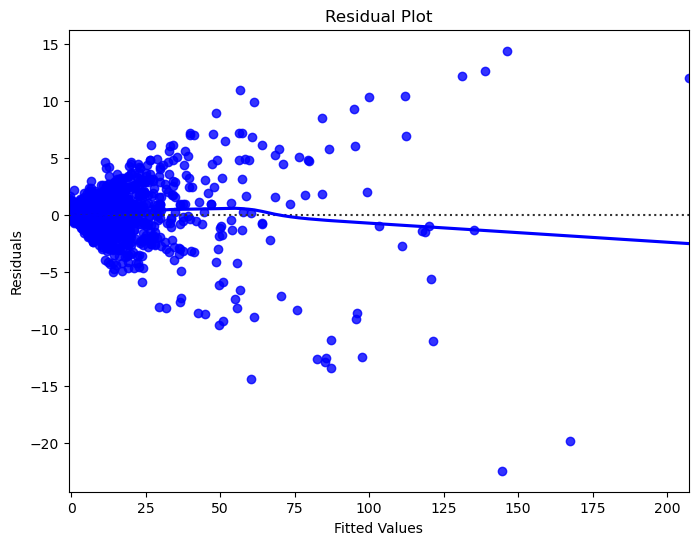

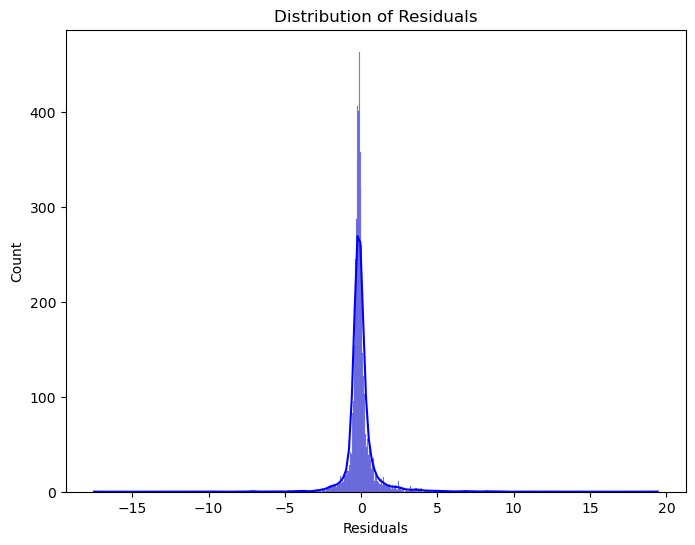

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame named 'df' with features and target variable
# X = df[features]
# y = df['target']


# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue")
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="blue")
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame named 'df' with features and target variable
# X = df[features]
# y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Train the model on the scaled training set
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
knn_model.score(X_test_scaled,y_test) * 100

Mean Squared Error: 7.752745917780473


94.78752096119206

In [31]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset and prepare features and target variable

# Choose the number of folds (k) for cross-validation
k_folds = 5

# Create a k-fold cross-validation object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Function to perform cross-validation and return performance metrics
def evaluate_model(model, X, y):
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    return -mse_scores  # Scikit-learn uses neg_mean_squared_error, so we negate it to get positive values

# Evaluate linear regression
linear_regression_scores = evaluate_model(model, X, y)

# Evaluate KNN regression
knn_regression_scores = evaluate_model(knn_model, X, y)

# Calculate mean scores across folds
#mean_linear_regression_score = np.mean(linear_regression_scores)
#mean_knn_regression_score = np.mean(knn_regression_scores)

# Print or visualize the results
print(f'Mean MSE for Linear Regression: {linear_regression_scores}')
print(f'Mean MSE for KNN Regression: {knn_regression_scores}')

# Optionally, you can perform statistical tests to compare the models
# For example, you could use paired t-tests to check if the performance difference is statistically significant


Mean MSE for Linear Regression: [1.57255232 1.37279157 1.13336477 1.26010723 1.4030321 ]
Mean MSE for KNN Regression: [2.10489014 1.45795045 1.41390981 2.16892671 1.72897809]


In [28]:
'Crossing'  'Finishing'   'HeadingAccuracy'   'ShortPassing'   
'Volleys'   'Dribbling'   'Curve'     'FKAccuracy'      'LongPassing'
'BallControl'         'Acceleration'     'SprintSpeed'     'Agility'
'Reactions'      'Balance'          'ShotPower'       'Jumping'
'Stamina'        'Strength'         'LongShots'       'Aggression'
'Interceptions'           'Positioning'       'Vision'    'Penalties'
'Composure'       'Marking'          'StandingTackle'     'SlidingTackle'
'GKDiving'        'GKHandling'       'GKKicking'    'GKPositioning'

'GKDivingGKHandlingGKKickingGKPositioning'

In [29]:
Traits ={'Rushes Out Of Goal' : ['Aggression','GKDiving','GKHandling','GKPositioning'],
         'GK Comes For Crosses' : }

SyntaxError: expression expected after dictionary key and ':' (267025388.py, line 2)